In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [6]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
#import data
data=pd.read_csv("Salary_Data.csv")
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
data.shape

(30, 2)

In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


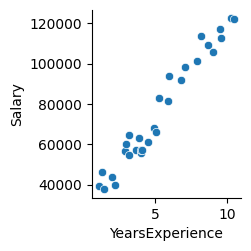

In [10]:
sns.pairplot(y_vars='Salary',x_vars='YearsExperience',data=data)


In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
X=data['YearsExperience']
y=data['Salary']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(24,)

In [15]:
X_test.shape

(6,)

In [16]:
X_train_sm=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_sm).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.03e-15
Time:                        23:02:14   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.678e+04   2818.687     

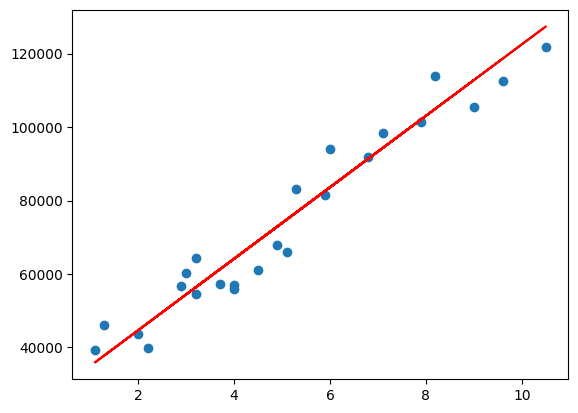

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,25200+X_train*9731.2038,'r')
plt.show()

In [19]:
y_train_pred=model.predict(X_train_sm)
y_train_pred.head()
residual=(y_train-y_train_pred)

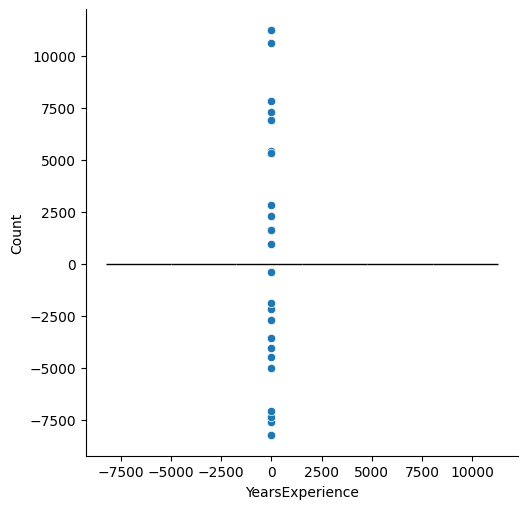

In [20]:
residual.head()
sns.displot(residual)
sns.scatterplot(x=X_train,y=residual)
X_test_sm=sm.add_constant(X_test)
y_pred=model.predict(X_test_sm)